In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

In [24]:
# Load the data, starting with the advanced metrics and the player totals.

nba_metrics = pd.read_csv("data/advanced.csv")
nba_totals = pd.read_csv("data/Player Totals.csv")
nba_df = pd.DataFrame(nba_totals)
metrics_df = pd.DataFrame(nba_metrics)


nba_df.head()
metrics_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,5.5,15.2,0.7,0.3,1.1,0.084,-0.4,-1.7,-2.1,0.0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,9.6,20.0,0.0,0.3,0.2,0.036,-3.1,-1.5,-4.6,-0.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,11.3,17.3,-0.4,0.0,-0.4,-0.120,-6.0,-3.5,-9.6,-0.3
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,11.2,17.8,4.5,2.6,7.1,0.148,1.2,0.1,1.3,1.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,10.6,16.7,1.3,1.2,2.5,0.094,-1.8,0.3,-1.5,0.2


In [25]:
nba_df['index'] = range(1, len(nba_df) + 1)
print(nba_df.columns)
metrics_df['index'] = range(1, len(metrics_df) + 1)
print(metrics_df.columns)

# Drop the redundant columns
metrics_df=metrics_df.drop(['seas_id','player_id','birth_year','pos','age','lg','tm','g','mp','x3p_ar','f_tr'], axis=1)

# Merge the two dataframes on the index column
nba_df = pd.merge(nba_df, metrics_df, on='index')
print(nba_df.columns)

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'index'],
      dtype='object')
Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar',
       'f_tr', 'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'index'],
      dtype='object')
Index(['seas_id', 'season_x', 'player_id', 'player_x', 'birth_year', 'pos',
       'age', 'experience_x', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_perce

#### Feature Engineering

In [27]:
# Let's make some per game stats
nba_df['pts_per_game'] = nba_df['pts'] / nba_df['g']
nba_df['ast_per_game'] = nba_df['ast'] / nba_df['g']
nba_df['trb_per_game'] = nba_df['trb'] / nba_df['g']
nba_df['blk_per_game'] = nba_df['blk'] / nba_df['g']
nba_df['stl_per_game'] = nba_df['stl'] / nba_df['g']
nba_df['tov_per_game'] = nba_df['tov'] / nba_df['g']
nba_df['pf_per_game'] = nba_df['pf'] / nba_df['g']
nba_df['fg_per_game'] = nba_df['fg'] / nba_df['g']
nba_df['fga_per_game'] = nba_df['fga'] / nba_df['g']
# nba_df['fg3_per_game'] = nba_df['fg3'] / nba_df['g']
# nba_df['fg3a_per_game'] = nba_df['fg3a'] / nba_df['g']
nba_df['ft_per_game'] = nba_df['ft'] / nba_df['g']
nba_df['fta_per_game'] = nba_df['fta'] / nba_df['g']
nba_df['orb_per_game'] = nba_df['orb'] / nba_df['g']
nba_df['drb_per_game'] = nba_df['drb'] / nba_df['g']

print(nba_df.columns)

Index(['seas_id', 'season_x', 'player_id', 'player_x', 'birth_year', 'pos',
       'age', 'experience_x', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'index', 'season_y',
       'player_y', 'experience_y', 'per', 'ts_percent', 'orb_percent',
       'drb_percent', 'trb_percent', 'ast_percent', 'stl_percent',
       'blk_percent', 'tov_percent', 'usg_percent', 'ows', 'dws', 'ws',
       'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'pts_per_game', 'ast_per_game',
       'trb_per_game', 'blk_per_game', 'stl_per_game', 'tov_per_game',
       'pf_per_game', 'fg_per_game', 'fga_per_game', 'ft_per_game',
       'fta_per_game', 'orb_per_game', 'drb_per_game'],
      dtype='object')


In [3]:
# Filter the DataFrame for Shooting Guards (SG)
sg_df = nba_df[nba_df['pos'] == 'SG']

# Display all column names
print(sg_df.columns)

# Sort the filtered DataFrame by 'usg_percent' in descending order
SG_byusg = sg_df.sort_values(by='usg_percent', ascending=False)

# Display the sorted DataFrame
SG_byusg.head()

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar',
       'f_tr', 'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp'],
      dtype='object')


,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
15443,16493,1999,3128,Kelly McCarty,NaN,SG,23.0,1,NBA,DEN,...,40.0,56.6,0.0,0.0,0.0,-0.238,2.3,-9.9,-7.6,0.0
892,30616,2023,5044,Donovan Williams,NaN,SG,21.0,1,NBA,ATL,...,0.0,52.5,0.0,0.0,0.0,-0.225,-9.1,-6.1,-15.2,0.0
6919,24625,2014,3998,DeAndre Liggins,NaN,SG,25.0,3,NBA,MIA,...,0.0,47.8,0.0,0.0,0.0,2.123,42.1,-0.6,41.5,0.0
16131,16127,1998,3090,Shea Seals,NaN,SG,22.0,1,NBA,LAL,...,0.0,47.8,-0.1,0.0,-0.1,-0.270,-10.2,-7.2,-17.5,0.0
10807,21489,2008,3716,Shannon Brown,NaN,SG,22.0,2,NBA,CHI,...,22.1,45.5,-0.3,0.0,-0.3,-0.592,-19.0,-8.4,-27.4,-0.1


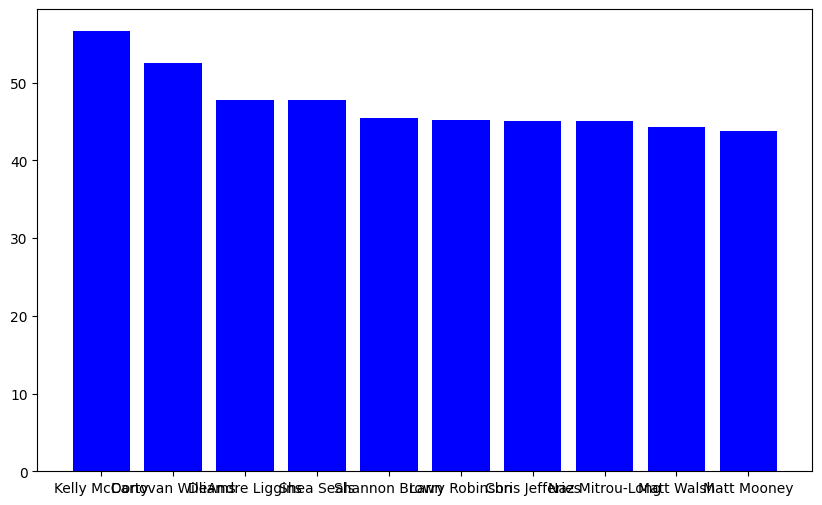

In [4]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('fivethirtyeight')

# Create a bar plot of 'usg_percent' for the top 10 shooting guards by points per game
plt.bar(SG_byusg['player'][:10], SG_byusg['usg_percent'][:10], color='blue')
plt.show()